In [3]:
#small exercise with prediction trees.
import pandas as pd

# Read CSV
df = pd.read_csv('../../datasets/trees/titanic.csv')
# Remove Empty values
df['Age'] = df['Age'].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Divide between features and target

In [4]:
# Remove not useful columns 
X = df.drop(['Survived', 'PassengerId', 'Name','SibSp', 'Parch', 'Ticket','Cabin','Embarked'], axis='columns')
y = df['Survived']
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


# Feature engineering: Transform categorical data into numbers

In [5]:
from sklearn.preprocessing import LabelEncoder
# Create encoder
e_sex = LabelEncoder()
# add new colums with encoded data
X['e_sex'] = e_sex.fit_transform(X['Sex'])
X.head()

,Pclass,Sex,Age,Fare,e_sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [6]:
#Remove the categorical columns: Sex
X = X.drop('Sex', axis = 'columns')
X.head()

,Pclass,Age,Fare,e_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [7]:
# Finally split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Build and Fit the Decision Tree Model

In [8]:
# ready to train classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()
params = model.get_params()
print(params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# check score
# 1 because we didn't divide 
model.score(X_test,y_test)

0.7864406779661017

# Try to improve the model

In [11]:
model02 = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=10, min_samples_leaf=5)
params = model.get_params()
print(params)
model02.fit(X_train, y_train)
model02.score(X_test,y_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


0.8

# Let's study some kaggle material

In [12]:
import numpy as np
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

# SKLearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


## Exploratory Data Analysis 

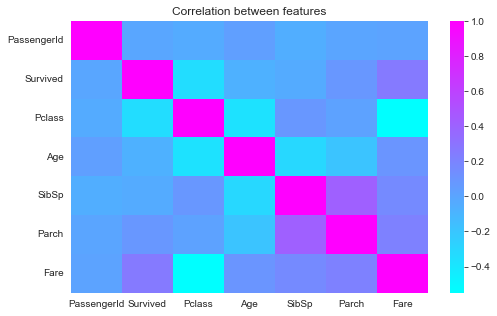

In [15]:
df = pd.read_csv('../../datasets/trees/titanic.csv')
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='cool')
plt.title('Correlation between features')
plt.show()

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# Find null values
print(type(df.isnull()))
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

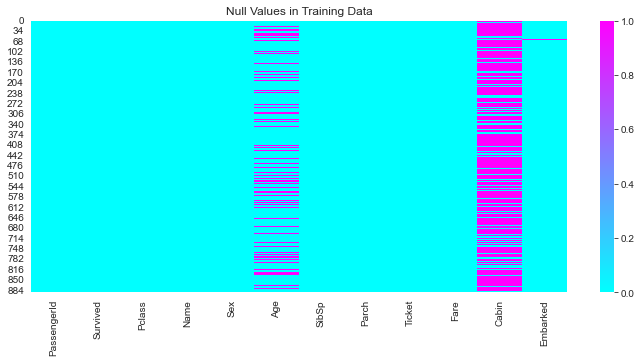

In [26]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cmap='cool')
plt.title('Null Values in Training Data')
plt.show()

##  Data Visualization and Data Cleaning

## 'Age' Feature has many NaN values, use the mean to fill in.

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/q1/g_dvb8cs1_3bs0f6sydvmwz80000gn/T/ipykernel_2680/1569474952.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


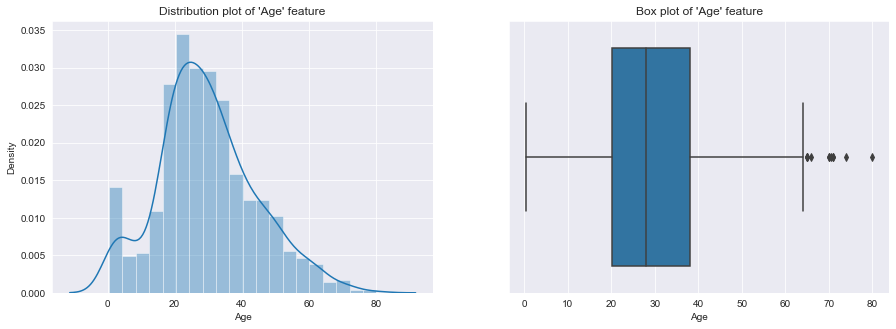

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Age'], ax=ax[0])
sns.boxplot(df['Age'], ax=ax[1])
ax[0].set_title("Distribution plot of 'Age' feature")
ax[1].set_title("Box plot of 'Age' feature")
fig.show()

In [30]:
# use the mean to fill the missing ages
df['Age'].fillna(df['Age'].mean(), inplace=True)


## 'Embarked' feature 

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


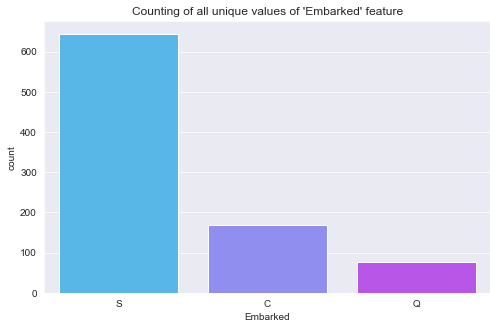

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df['Embarked'], palette='cool', orient='v')
plt.title("Counting of all unique values of 'Embarked' feature")
plt.show()

In [33]:
# the most common value is S, fill the NaNs with S
df['Embarked'].fillna('S', inplace=True)

## 'Cabin' features: Count unique Null values

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


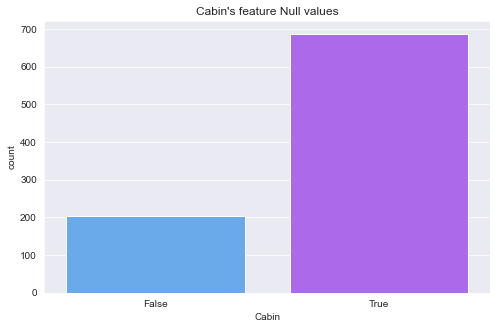

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(df['Cabin'].isnull(), palette='cool', orient='H')
plt.title("Cabin's feature Null values")
plt.show()

In [41]:
#drop values of cabin as there are many nulls
df.drop('Cabin', axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [42]:
# Data has been cleanup
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## Find outliers


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/q1/g_dvb8cs1_3bs0f6sydvmwz80000gn/T/ipykernel_2680/1592297760.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


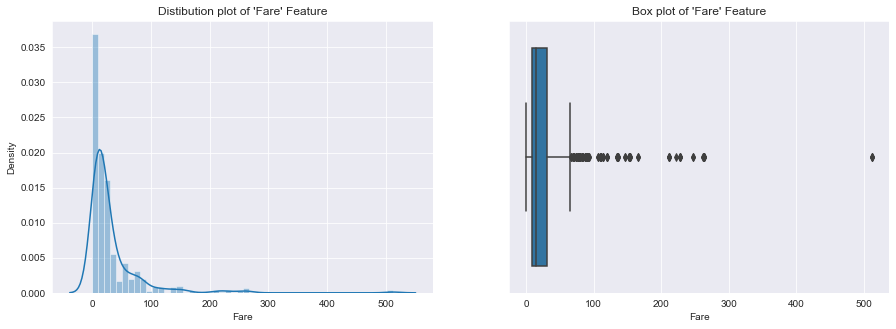

In [46]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Fare'],ax=ax[0])
sns.boxplot(df['Fare'],ax=ax[1])
ax[1].set_title("Box plot of 'Fare' Feature")
ax[0].set_title("Distibution plot of 'Fare' Feature")
fig.show()


In [47]:
#median
med = df['Fare'].median()
Q = np.quantile(df['Fare'], 0.945)
df['Fare'] = df['Fare'].apply(lambda x: med if x > Q else x)


## One hot encodings

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

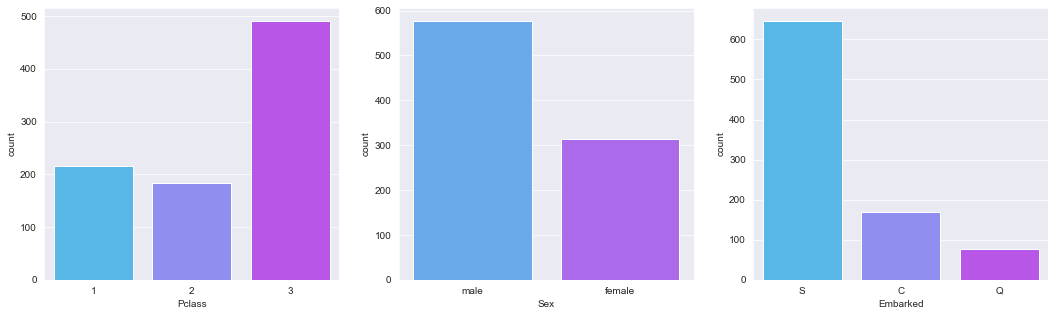

In [48]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
sns.countplot(df['Pclass'], palette='cool', ax=ax[0])
sns.countplot(df['Sex'], palette='cool', ax=ax[1])
sns.countplot(df['Embarked'], palette='cool', ax=ax[2])
plt.show()

In [57]:
# Get one hot and codings and rename the columns
v_pclass = pd.get_dummies(df['Pclass'])
v_pclass.columns   = ['Pclass_1', 'Pclass_2', 'Pclass_3']

v_sex = pd.get_dummies(df['Sex'])
v_sex.columns = ['Female', 'Male']

v_embarked = pd.get_dummies(df['Embarked'])
v_embarked.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']



In [69]:
# Create new Dataframe with encoded data
data = pd.concat([df, v_pclass, v_sex, v_embarked], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,1,0,0,1


In [70]:
# Now drop all the colums you won't use
data.drop(['Name','Pclass','Sex','Ticket','Embarked'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


## Split data and Scale

In [71]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [74]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array)
X_scaled.columns = X.columns
X_scaled.head(2)


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,-1.730108,-0.592481,0.432793,-0.473674,-0.717273,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.726220,0.638789,0.432793,-0.473674,2.322992,1.767767,-0.510152,-1.107926,1.355574,-1.355574,2.074505,-0.307562,-1.623803


## Time to split the dataset

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)
X_train.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
715,1.049728,-0.823344,-0.474545,-0.473674,-0.698282,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
156,-1.123598,-1.054207,-0.474545,-0.473674,-0.694327,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,3.251373,-1.623803
11,-1.687341,2.177876,-0.474545,-0.473674,0.199080,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838
510,0.252712,-0.053800,-0.474545,-0.473674,-0.693534,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,3.251373,-1.623803
856,1.597920,1.177469,0.432793,0.767630,-0.375222,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838


## Finally try some models

In [96]:
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train, y_train)
print('Model Trained...')
print(f'Training Accuracy - {(model_logistic_regression.score(X_train, y_train) * 100).round(2)}%')

Model Trained...
Training Accuracy - 81.14%


## Predictions

In [98]:
y_pred = model_logistic_regression.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(f'Testing Accuracy - {(score * 100).round(2)}%')

Testing Accuracy - 78.03%


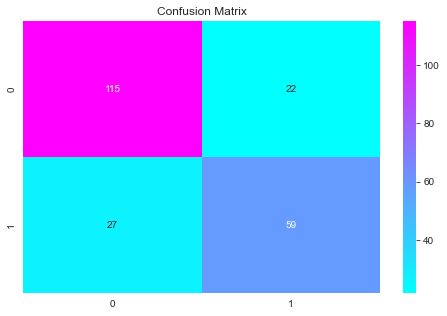

In [99]:
plt.figure(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='cool', annot=True, fmt='g', linecolor='black')
plt.title('Confusion Matrix')
plt.show()